## Project Name : Global Power Plant Database

# Dataset Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. 

The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). 

Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [4]:
df.shape

(908, 25)

In [5]:
# Missing Values
print(df.isna().sum())

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64


<AxesSubplot:>

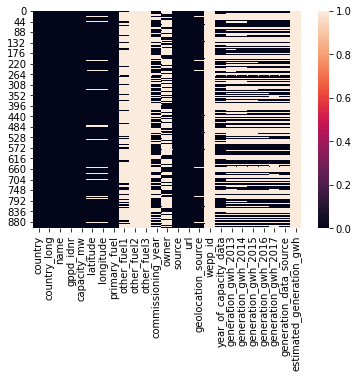

In [6]:
sns.heatmap(df.isnull())

We can see in the heatmap that there are lot of null values present in the dataset.

#### We will drop these columns :-

>country & country_long - it does not contribute in the prediction as they has same values

>name - this columns do not contribute in prediction

>gppd_idnr - not required for prediction

>latitude - it has only geographical coordinates hence the values do not contribute in the prediction

>longitude - it has only geographical coordinates hence the values do not contribute in the prediction

>other_fuel1 - this column has large amount of null values

>other_fuel2 - this column has almost 80% null values

>other_fuel3 - this column has only null values

>estimated_generation_gwh - this column has only null values

>wepp_id - this column has only null values

>url - do not contribute

>owner - do not contribute and it has more null values

>year_of_capacity_data - same values present, hence do not contribute much


In [7]:
df.drop(columns = "country", inplace = True)
df.drop(columns = "country_long", inplace = True)
df.drop(columns = "name", inplace = True)
df.drop(columns = "gppd_idnr", inplace = True)
df.drop(columns = "latitude", inplace = True)
df.drop(columns = "longitude", inplace = True)
df.drop(columns = "other_fuel1", inplace = True)
df.drop(columns = "other_fuel2", inplace = True)
df.drop(columns = "other_fuel3", inplace = True)
df.drop(columns = "estimated_generation_gwh", inplace = True)
df.drop(columns = "wepp_id", inplace = True)
df.drop(columns = "url", inplace = True)
df.drop(columns = "owner", inplace = True)
df.drop(columns = "year_of_capacity_data", inplace = True)

<AxesSubplot:>

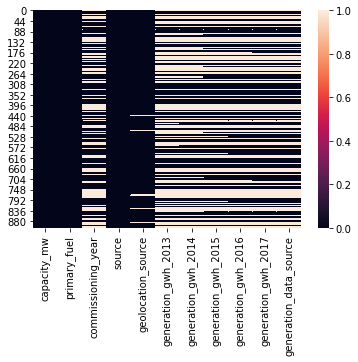

In [8]:
sns.heatmap(df.isnull())

### Treating Missing Values:

Here, we are omitting the Null values with their respective median and replacing NaN values with 0.

In [9]:
df.fillna(value = 0 ,inplace = True)

df['commissioning_year'].replace(0, df['commissioning_year'].median(),inplace = True)

df['generation_gwh_2013'].replace(0, df['generation_gwh_2013'].median(),inplace = True)

df['generation_gwh_2014'].replace(0, df['generation_gwh_2014'].median(),inplace = True)

df['generation_gwh_2015'].replace(0, df['generation_gwh_2015'].median(),inplace = True)

df['generation_gwh_2016'].replace(0, df['generation_gwh_2016'].median(),inplace = True)

df['generation_gwh_2017'].replace(0, df['generation_gwh_2017'].median(),inplace = True)

In [10]:
df.isnull().sum()

capacity_mw               0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

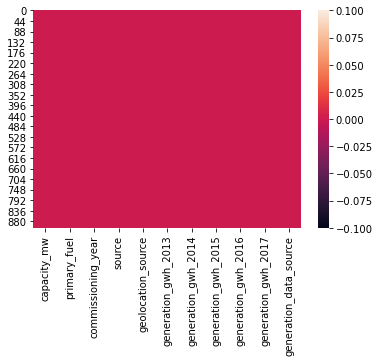

In [11]:
sns.heatmap(df.isnull())

Now, we can see that there are no null values present in it.

### Exploratory Data Analysis:

### Univariate analysis:

Below, the data is represented by -

>Countplot - which gives the counts of the data presented in the column.

>Distplot - gives the distribution of the data

>Boxplot - shows the outlier if there are present in the particular column.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

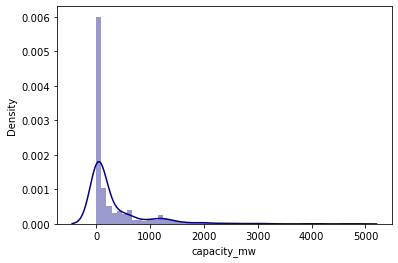

In [12]:
sns.distplot(df['capacity_mw'], color='navy')

<AxesSubplot:xlabel='capacity_mw'>

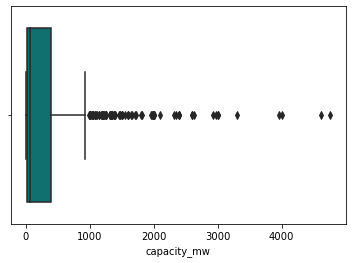

In [13]:
sns.boxplot(df['capacity_mw'], color='teal')

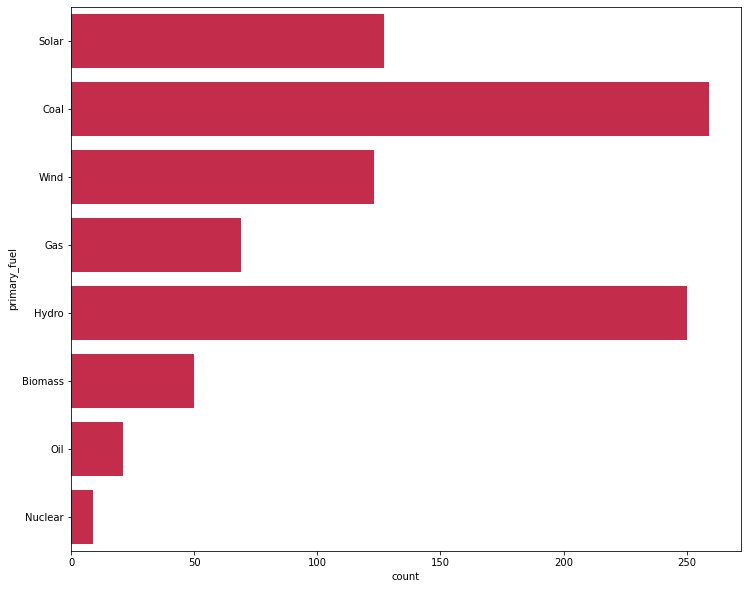

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(y="primary_fuel", data=df, color="crimson")
plt.show()

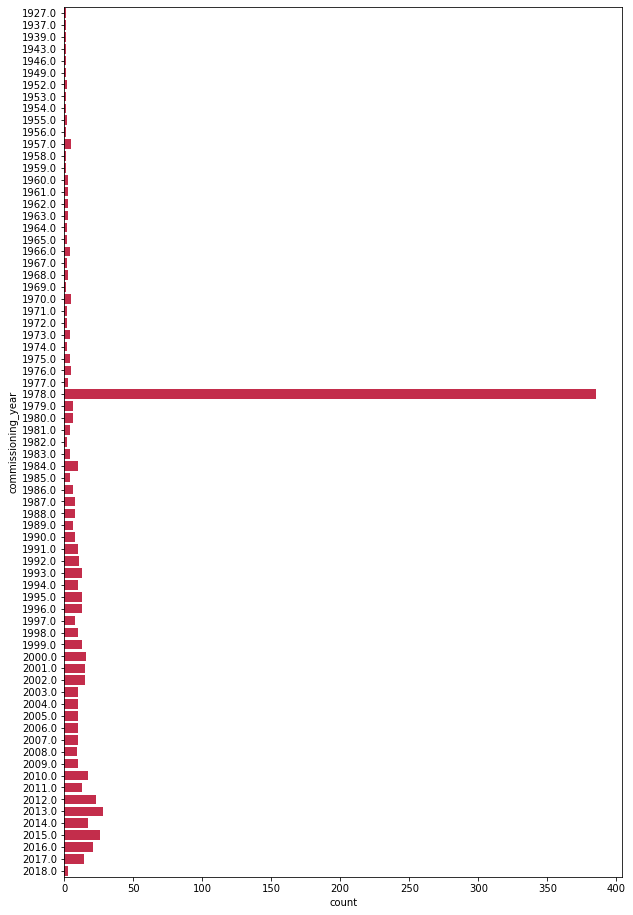

In [15]:
plt.figure(figsize=(10,16))
sns.countplot(y="commissioning_year", data=df, color="crimson")
plt.show()

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

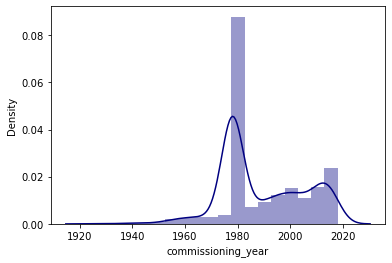

In [16]:
sns.distplot(df['commissioning_year'], color='navy')

<AxesSubplot:xlabel='commissioning_year'>

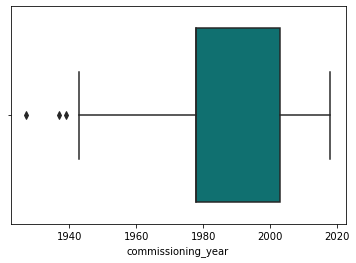

In [17]:
sns.boxplot(df['commissioning_year'], color='teal')

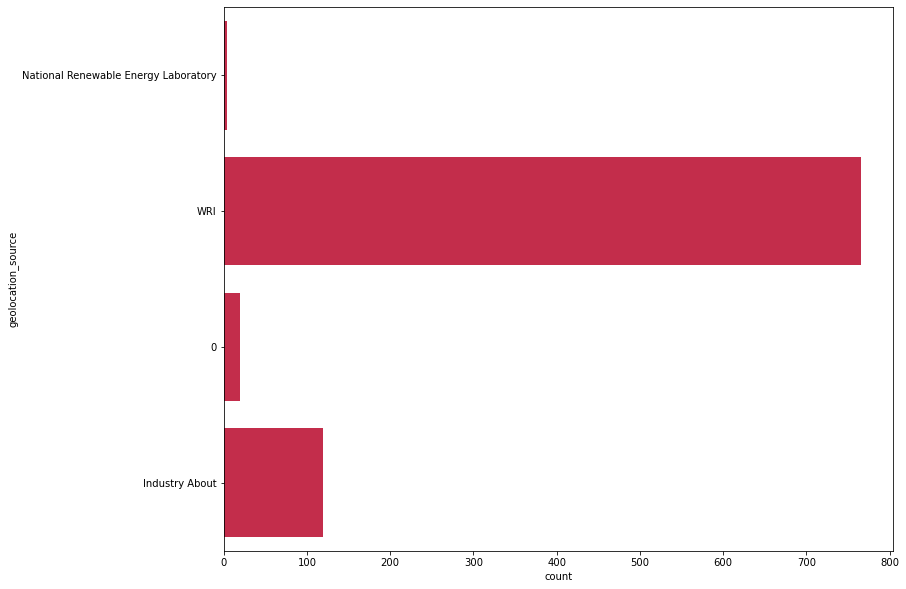

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(y="geolocation_source", data=df, color="crimson")
plt.show()

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

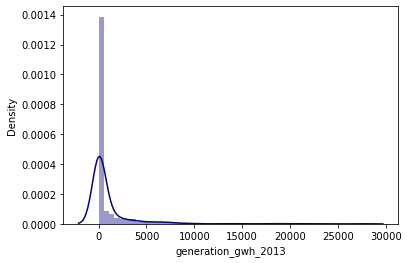

In [19]:
sns.distplot(df['generation_gwh_2013'], color='navy')

<AxesSubplot:xlabel='generation_gwh_2013'>

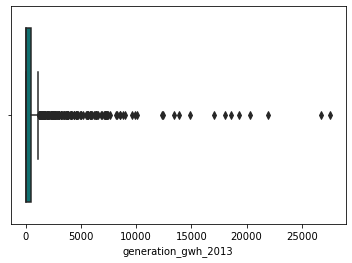

In [20]:
sns.boxplot(df['generation_gwh_2013'], color='teal')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

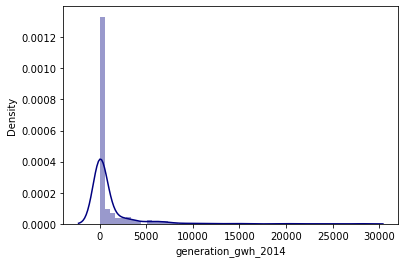

In [21]:
sns.distplot(df['generation_gwh_2014'], color='navy')

<AxesSubplot:xlabel='generation_gwh_2014'>

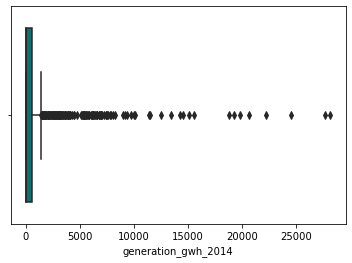

In [22]:
sns.boxplot(df['generation_gwh_2014'], color='teal')

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

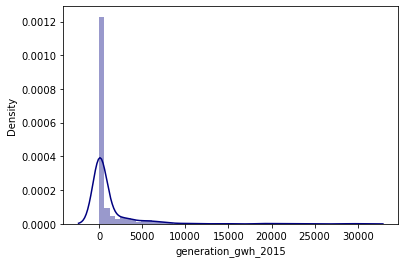

In [23]:
sns.distplot(df['generation_gwh_2015'], color='navy')

<AxesSubplot:xlabel='generation_gwh_2015'>

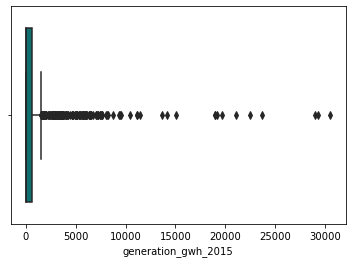

In [24]:
sns.boxplot(df['generation_gwh_2015'], color='teal')

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

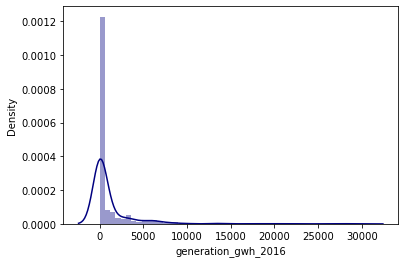

In [25]:
sns.distplot(df['generation_gwh_2016'], color='navy')

<AxesSubplot:xlabel='generation_gwh_2016'>

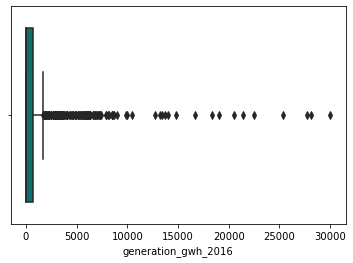

In [26]:
sns.boxplot(df['generation_gwh_2016'], color='teal')

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

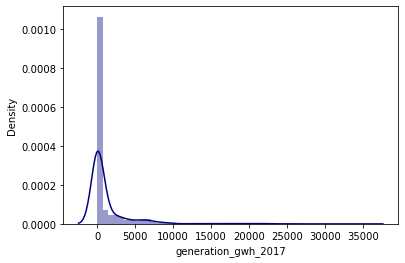

In [27]:
sns.distplot(df['generation_gwh_2017'], color='navy')

<AxesSubplot:xlabel='generation_gwh_2017'>

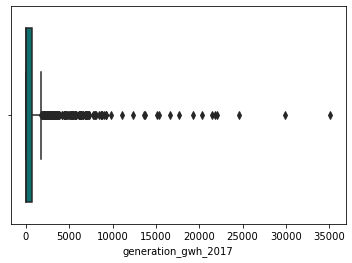

In [28]:
sns.boxplot(df['generation_gwh_2017'], color='teal')

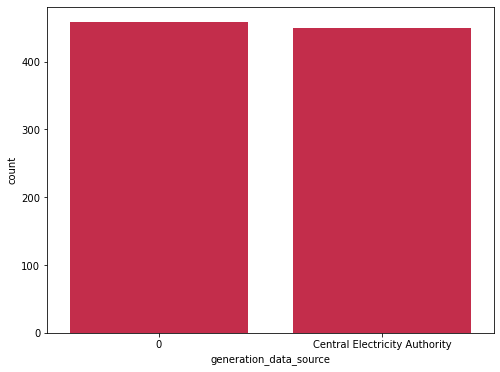

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x="generation_data_source", data=df, color="crimson")
plt.show()

### Bivariate Analysis:

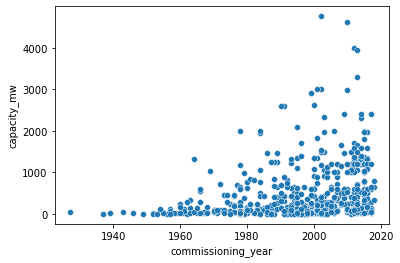

In [30]:
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

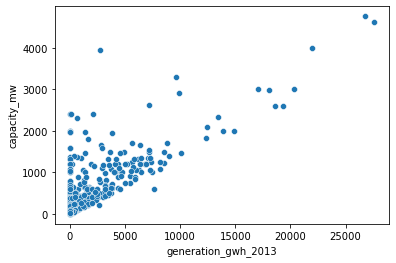

In [31]:
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw", data = df)
plt.show()

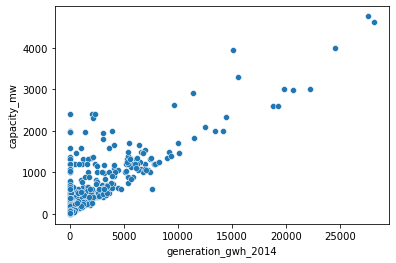

In [32]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df)
plt.show()

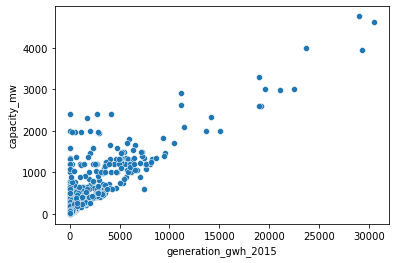

In [33]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df)
plt.show()

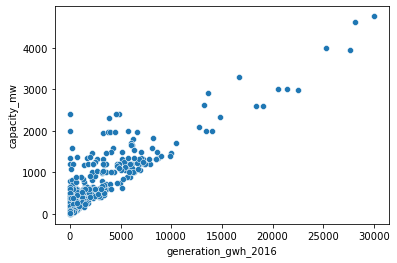

In [34]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df)
plt.show()

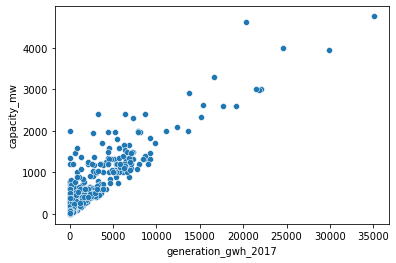

In [35]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = df)
plt.show()

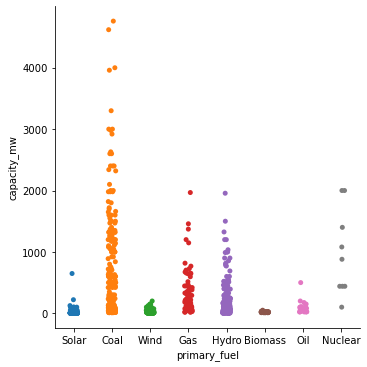

In [36]:
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

<Figure size 1080x720 with 0 Axes>

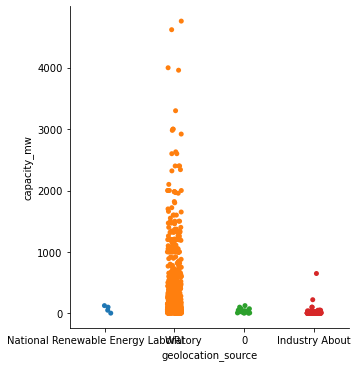

In [37]:
plt.figure(figsize=(15,10))
sns.catplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

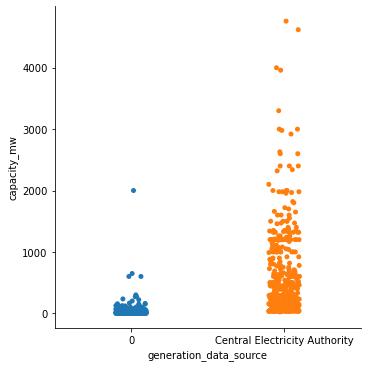

In [38]:
sns.catplot(x = "generation_data_source", y = "capacity_mw", data = df)
plt.show()

<Figure size 1296x720 with 0 Axes>

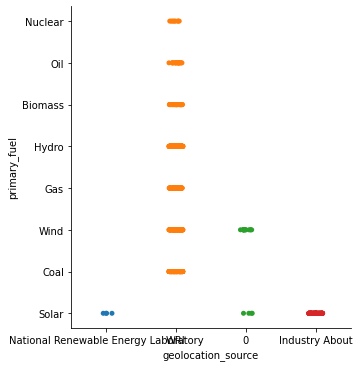

In [39]:
plt.figure(figsize=(18,10))
sns.catplot(x = "geolocation_source", y = "primary_fuel", data = df)
plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

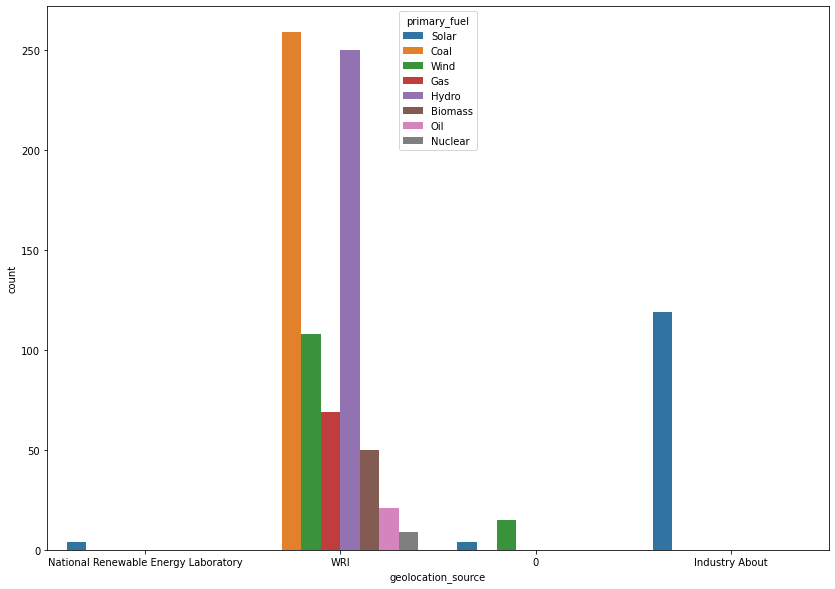

In [40]:
plt.subplots(figsize=(14,10))
sns.countplot(x='geolocation_source',hue='primary_fuel',data=df)

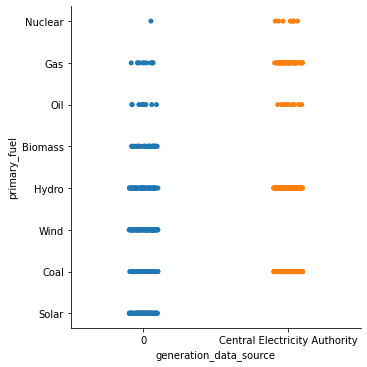

In [41]:
sns.catplot(x = "generation_data_source", y = "primary_fuel", data = df)
plt.show()

### Mutilvariate Analysis:

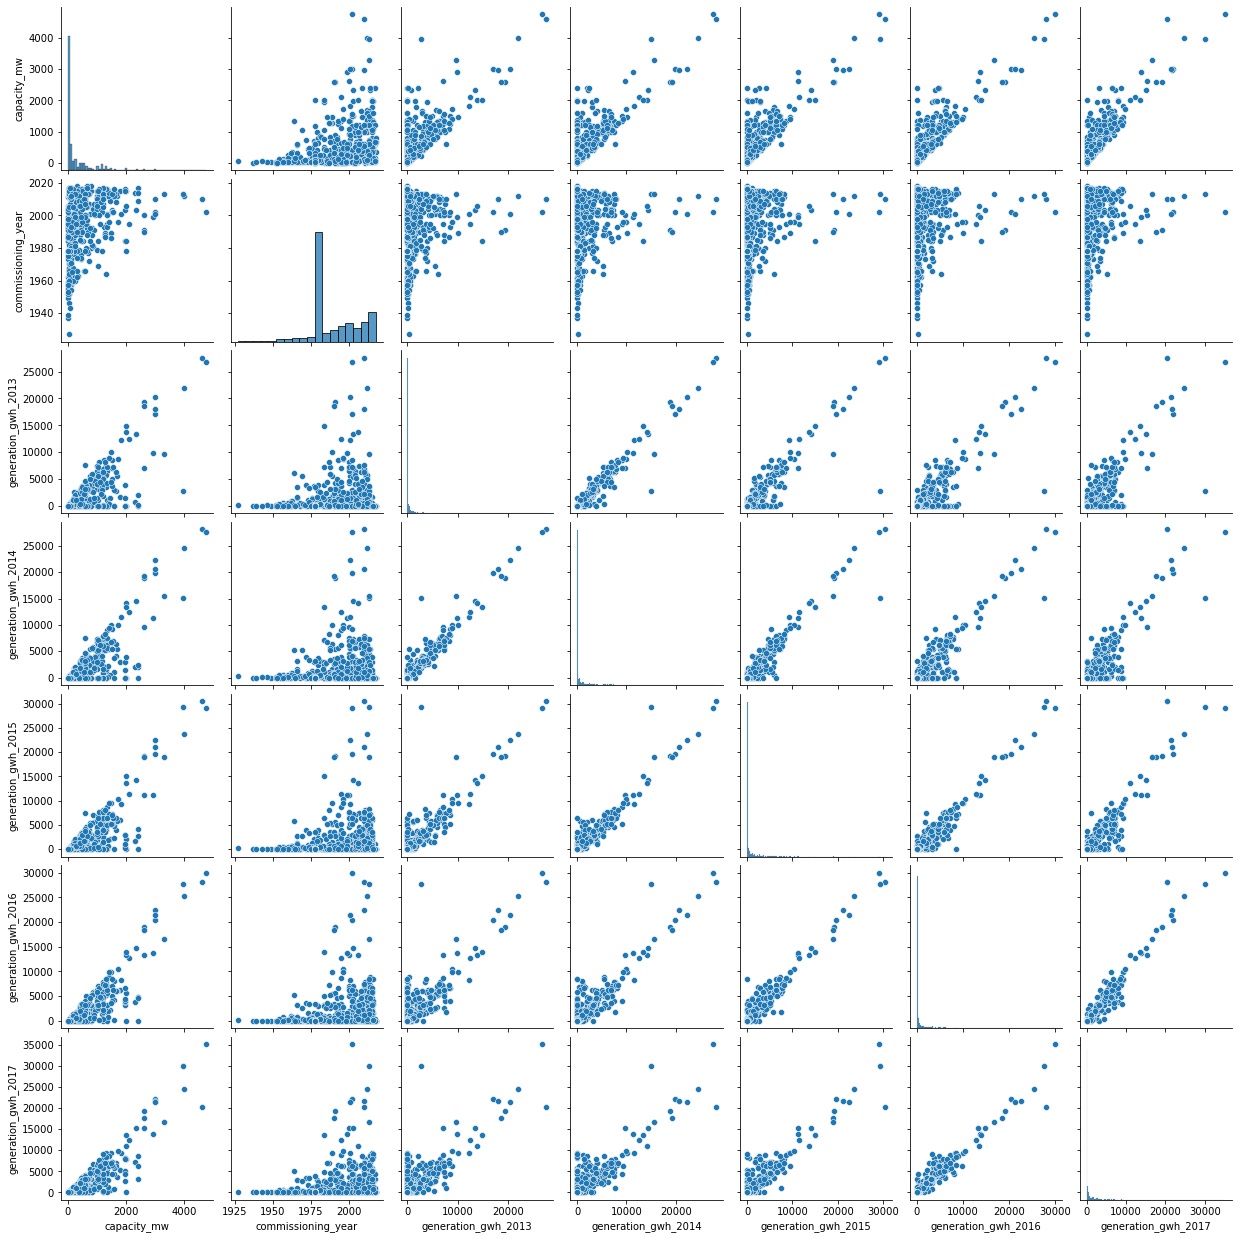

In [42]:
sns.pairplot(df)

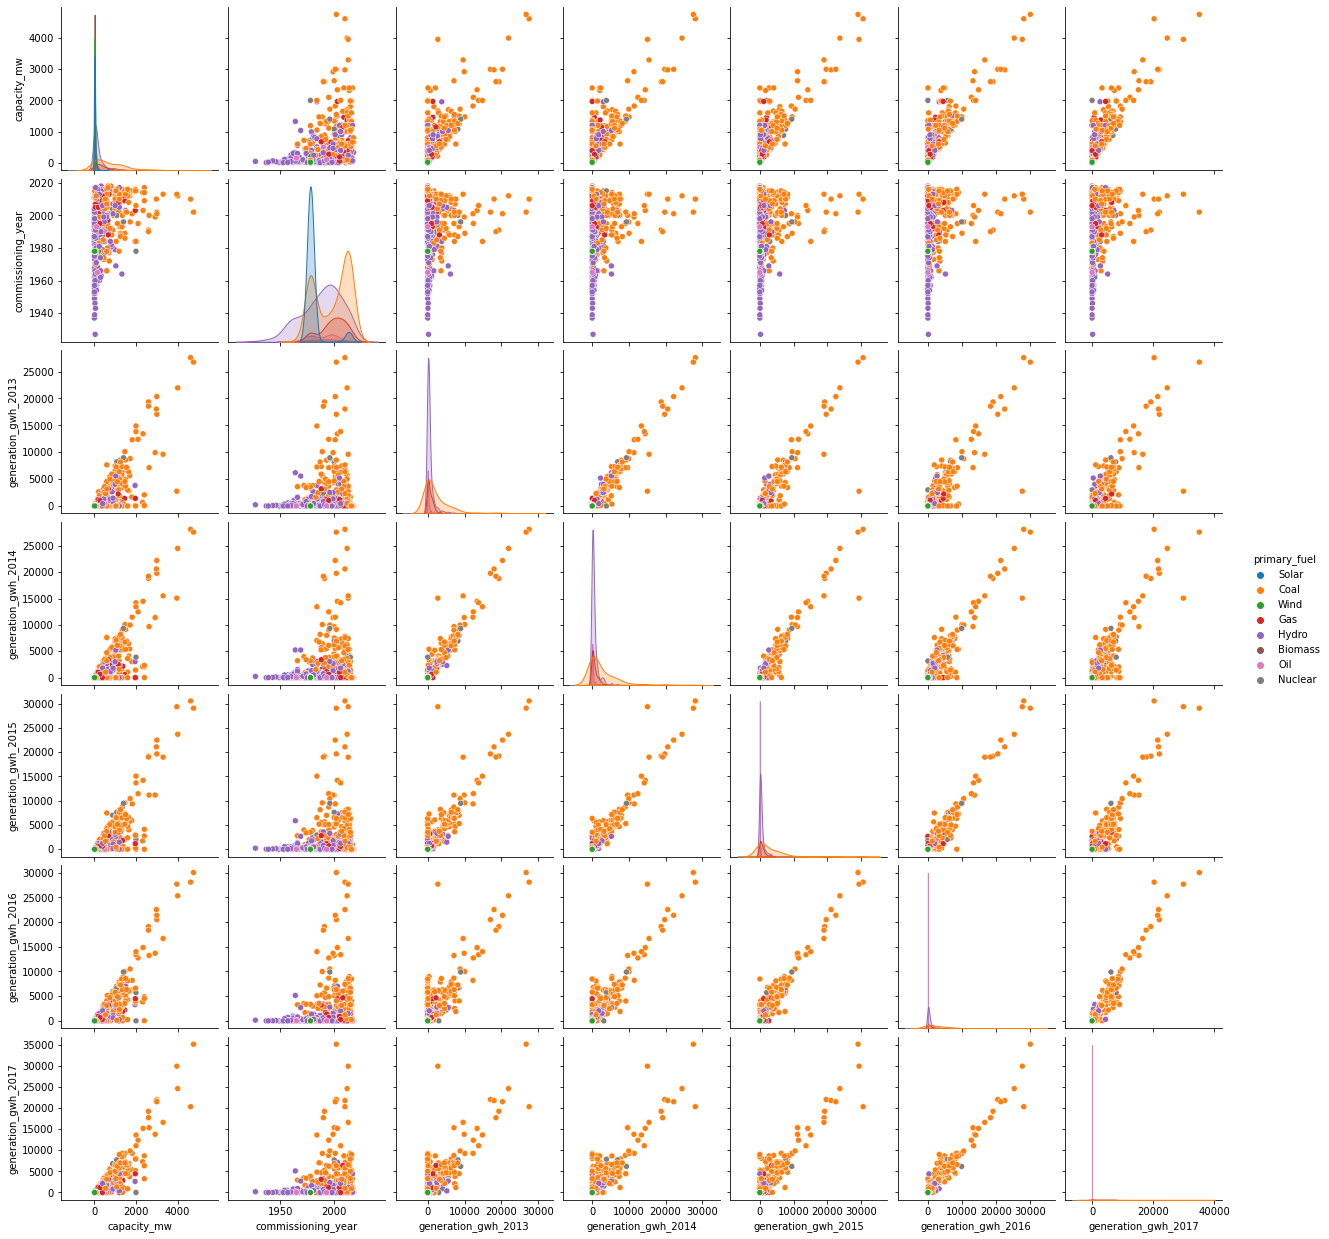

In [43]:
sns.pairplot(df,hue="primary_fuel")

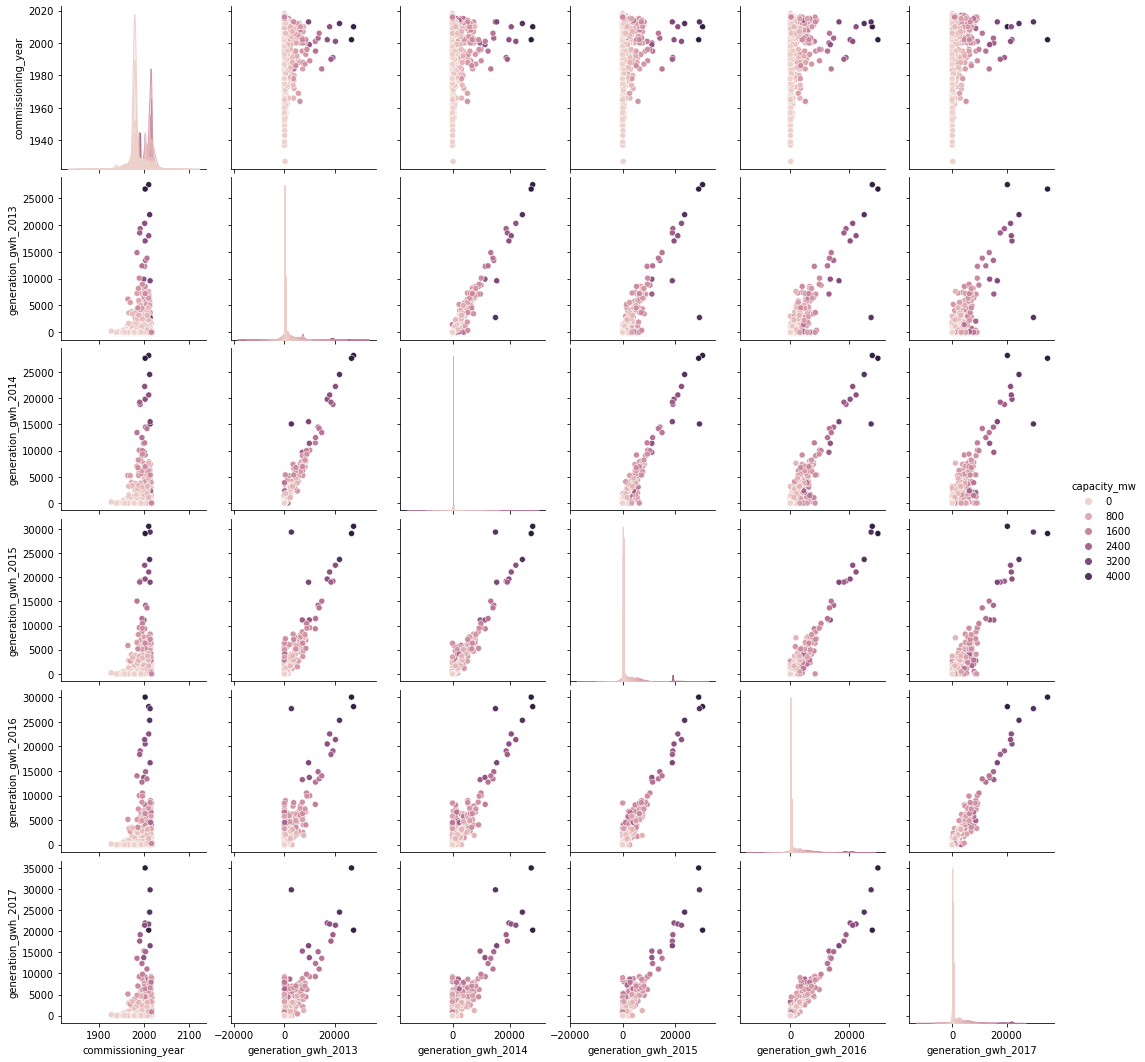

In [44]:
sns.pairplot(df,hue="capacity_mw")

### Statistical Summary:

In [45]:
df.describe()

,capacity_mw,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,1988.976872,974.403892,1068.918194,1129.934756,1181.024405,1235.206195
std,580.221767,15.989954,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866
min,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,388.125000,2003.000000,470.116200,570.095213,605.769975,669.808766,708.134037
max,4760.000000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


### Encoding:

We are using Label Encoder to convert all the categorical values into numeric

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['primary_fuel'] = labelencoder.fit_transform(df['primary_fuel'])

In [47]:
df['source'] = LabelEncoder().fit_transform(df['source'].tolist())

In [48]:
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'].tolist())

In [49]:
df['generation_data_source'] = LabelEncoder().fit_transform(df['generation_data_source'].tolist())

In [50]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,6,2011.0,109,2,0.000000,0.000000,0.000,0.000000,0.000000,0
1,98.0,1,1978.0,174,3,0.000000,0.000000,0.000,0.000000,0.000000,0
2,39.2,7,1978.0,21,3,0.000000,0.000000,0.000,0.000000,0.000000,0
3,135.0,2,2004.0,22,3,631.777928,617.789264,843.747,886.004428,663.774500,1
4,1800.0,1,2015.0,22,3,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,1


In [51]:
df.dtypes

capacity_mw               float64
primary_fuel                int32
commissioning_year        float64
source                      int64
geolocation_source          int64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int64
dtype: object

### Correlation:

In [52]:
df.corr()

,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
capacity_mw,1.000000,-0.377783,0.455000,-0.241701,0.217000,0.776258,0.827206,0.853262,0.886996,0.902431,0.494694
primary_fuel,-0.377783,1.000000,-0.379426,0.053609,-0.545149,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809,-0.481758
commissioning_year,0.455000,-0.379426,1.000000,-0.298058,0.239503,0.225543,0.261654,0.295814,0.332322,0.352089,0.568617
source,-0.241701,0.053609,-0.298058,1.000000,-0.430880,-0.175636,-0.178975,-0.178242,-0.184782,-0.189846,-0.485036
geolocation_source,0.217000,-0.545149,0.239503,-0.430880,1.000000,0.151516,0.154397,0.153765,0.159407,0.163775,0.418427
generation_gwh_2013,0.776258,-0.273831,0.225543,-0.175636,0.151516,1.000000,0.972933,0.911988,0.881259,0.843310,0.362109
generation_gwh_2014,0.827206,-0.286188,0.261654,-0.178975,0.154397,0.972933,1.000000,0.966814,0.938005,0.907610,0.368993
generation_gwh_2015,0.853262,-0.291437,0.295814,-0.178242,0.153765,0.911988,0.966814,1.000000,0.974765,0.944029,0.367483
generation_gwh_2016,0.886996,-0.304274,0.332322,-0.184782,0.159407,0.881259,0.938005,0.974765,1.000000,0.976451,0.380967
generation_gwh_2017,0.902431,-0.313809,0.352089,-0.189846,0.163775,0.843310,0.907610,0.944029,0.976451,1.000000,0.391406


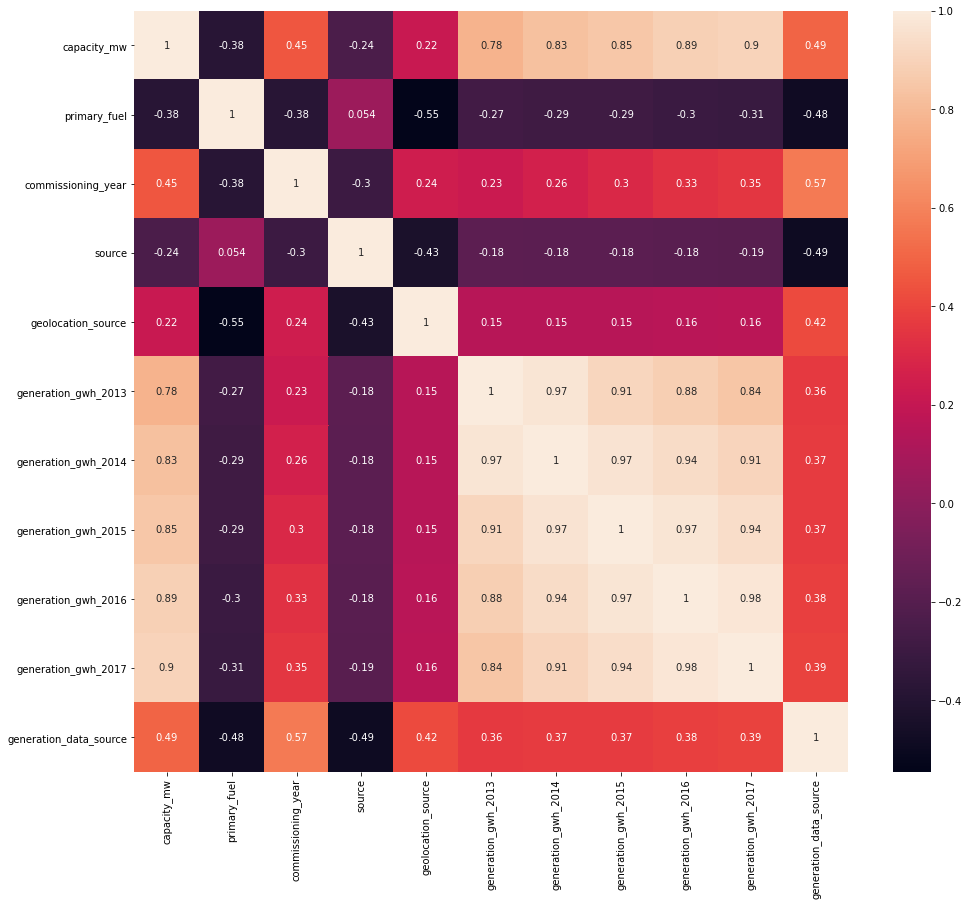

In [53]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Above, we can see that generation_gwh_2016 and generation_gwh_2017 both are highly (i.e. 0.98) correlated with each other. Hence we are dropping the generation_gwh_2016 column.

In [54]:
''' dropping the column '''

df.drop(columns = "generation_gwh_2016", inplace = True)

### Removing Outliers:

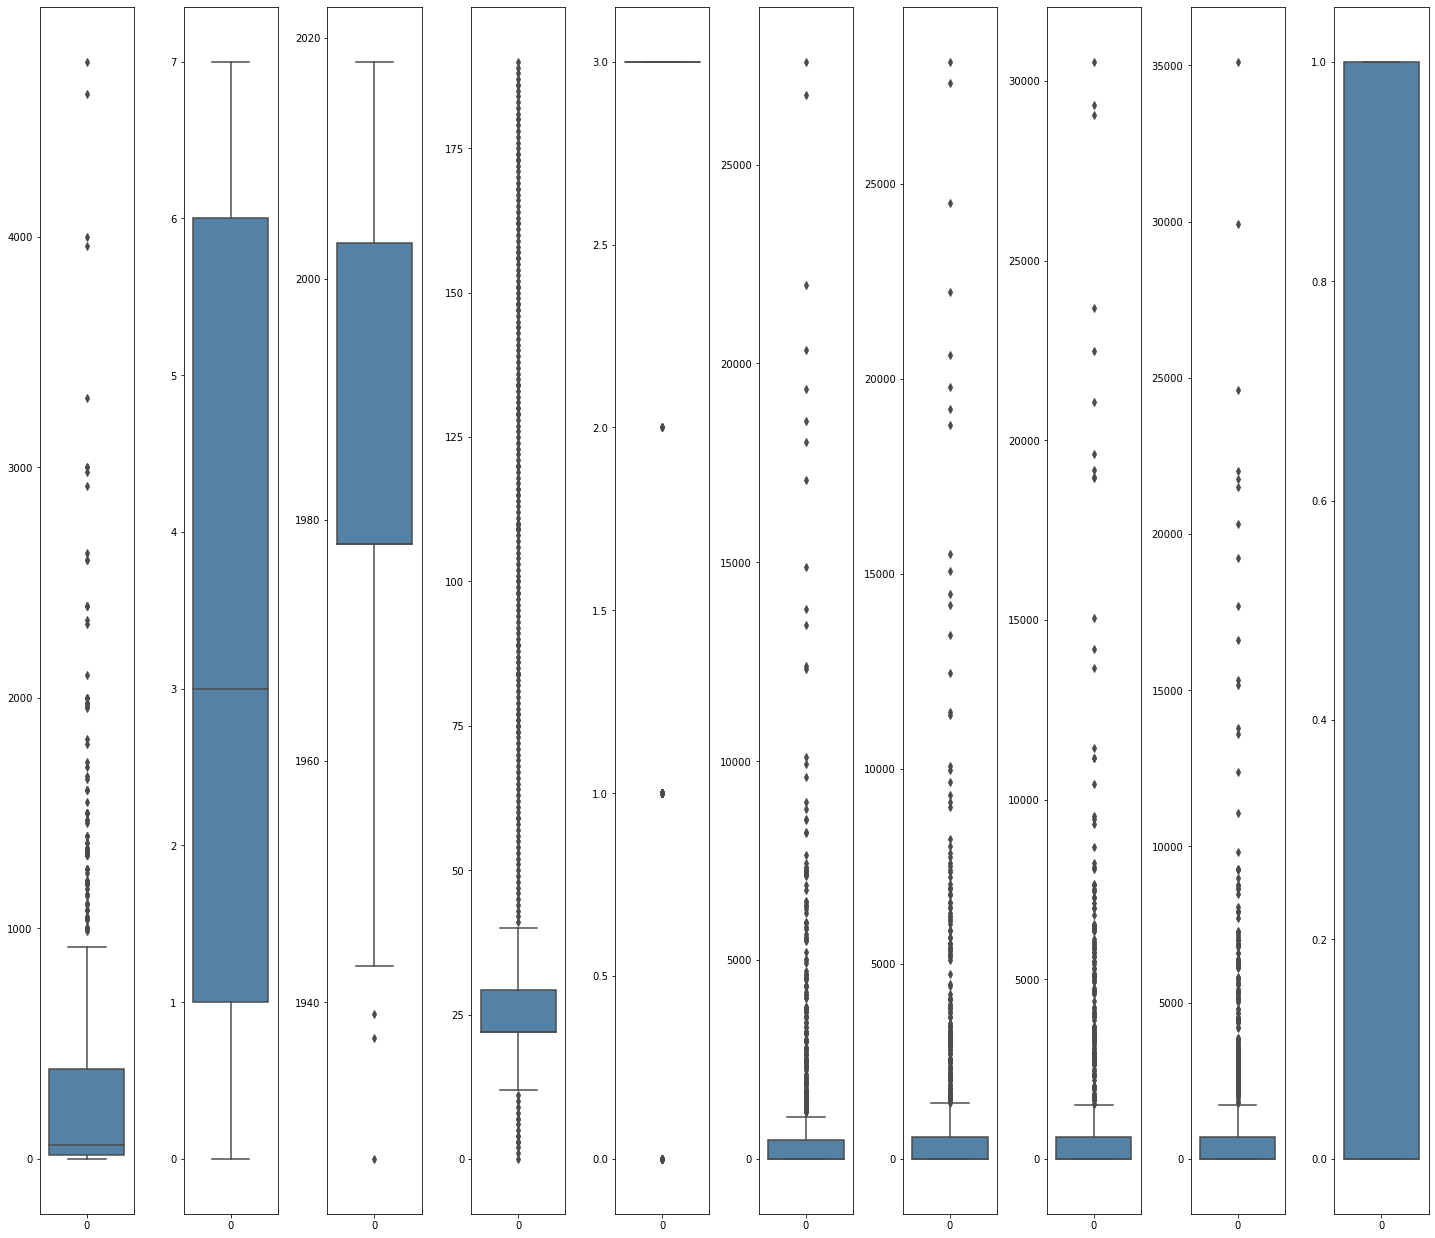

In [55]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

Using zscore, the outliers are removed from the dataframe. created new dataframe with no null values present in it

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [57]:
new_df=df[(z<3).all(axis=1)]

In [58]:
new_df.shape

(848, 10)

In [59]:
df.shape

(908, 10)

In [60]:
''' Data Loss '''

Data_loss = ((908-882)/908)*100
Data_loss

2.8634361233480177

The loss of data after removing the ouliers is 2.863%.

### Skewness:

In [61]:
new_df.skew()

capacity_mw               1.987008
primary_fuel              0.481522
commissioning_year        0.281769
source                    1.841105
geolocation_source       -2.117624
generation_gwh_2013       2.883388
generation_gwh_2014       2.761979
generation_gwh_2015       2.585017
generation_gwh_2017       2.445535
generation_data_source   -0.009451
dtype: float64

Plotting the distribution plot for new dataframe to see the distribution as well as skewness present in the dataset.

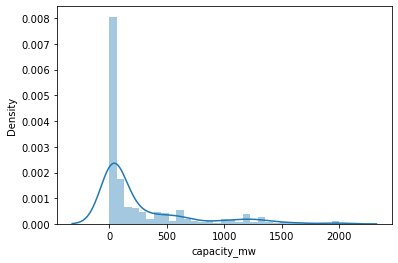

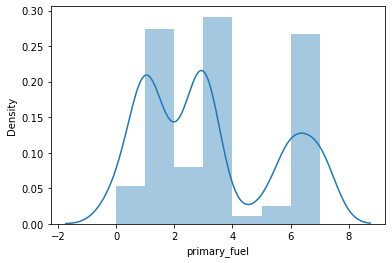

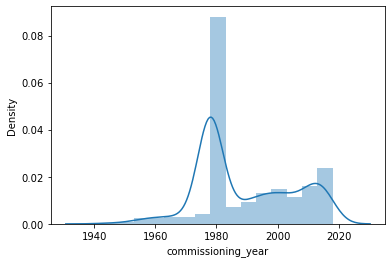

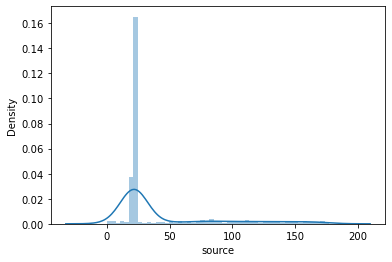

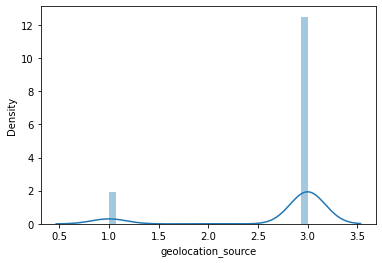

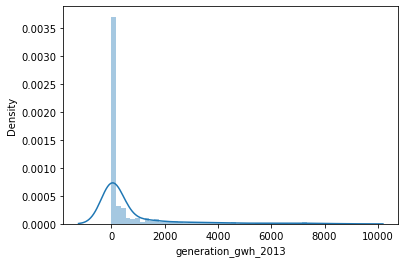

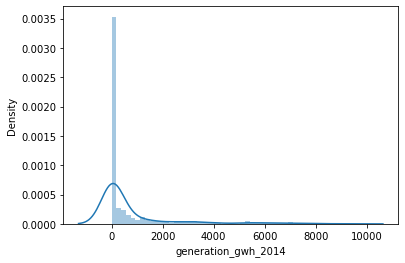

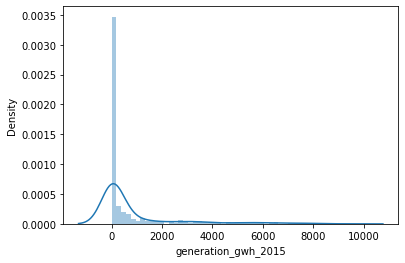

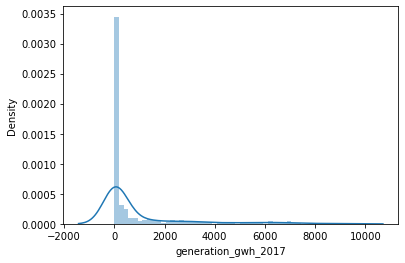

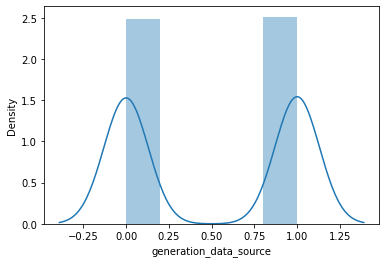

In [62]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

### Removing Skewness:

In [63]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [64]:
new_df.skew()

capacity_mw               0.041206
primary_fuel              0.481522
commissioning_year        0.281769
source                    0.819854
geolocation_source       -2.117624
generation_gwh_2013       0.622087
generation_gwh_2014       0.580493
generation_gwh_2015       0.512190
generation_gwh_2017       0.447364
generation_data_source   -0.009451
dtype: float64

## PREDICTION for :

> # 1. Primary Fuel

### Spliting the data into Feature and Target:

In [65]:
x = df.drop(columns = "primary_fuel")
y = df["primary_fuel"]

In [66]:
x.shape

(908, 9)

In [67]:
y.shape

(908,)

In [68]:
x.head()

,capacity_mw,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_data_source
0,2.5,2011.0,109,2,0.000000,0.000000,0.000,0.000000,0
1,98.0,1978.0,174,3,0.000000,0.000000,0.000,0.000000,0
2,39.2,1978.0,21,3,0.000000,0.000000,0.000,0.000000,0
3,135.0,2004.0,22,3,631.777928,617.789264,843.747,663.774500,1
4,1800.0,2015.0,22,3,1668.290000,3035.550000,5916.370,5385.579736,1


In [69]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [70]:
y.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

We can observe the class imbalance is present in the target variable.

In [71]:
''' By using SMOTE will try to resolve the  class imbalance '''

import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [72]:
y.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

### Scalling:

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [74]:
x.shape

(908, 9)

In [75]:
y.shape

(908,)

In [76]:
# importing all the required libraries

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [78]:
lc=LogisticRegression()
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.7417582417582418  on Random_state 11


### Train Test Split the data:

We got the We got the Best Accuracy is 0.7417582417582418  on Random_state 11. Hence, using these values we are going to train our data using following models :-

> Logostic Regression

> Decision Tree Classifier

> Random Forest Classifier

> GaussianNB

> KNeighbors Classifier

> Gradient Boosting Classifier

> SVC

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=11)

In [80]:
x_train.shape

(681, 9)

In [81]:
x_test.shape

(227, 9)

In [82]:
y_train.shape

(681,)

In [83]:
y_test.shape

(227,)

In [84]:
# Logistic Regression

lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 72.24669603524228%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 6  3  0  0  0  0  0  1]
 [ 1 53  1 13  0  0  0  4]
 [ 1  4  0  8  0  0  0  0]
 [ 0  9  0 54  0  0  0  5]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  6  0  0  0  1]
 [ 0  0  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  2 26]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.76      0.74      0.75        72
           2       0.00      0.00      0.00        13
           3       0.66      0.79      0.72        68
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.93      0.93      0.93        27
           7       0.67      0.93      0.78        28

    accuracy                           0.72       227
   macro avg       0.47      0.50      0.48       227
weighted avg       0.66      0.72      0.69    

In [85]:
#Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 75.33039647577093%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 7  2  0  0  0  1  0  0]
 [ 1 54  7  7  0  3  0  0]
 [ 1  4  1  7  0  0  0  0]
 [ 0  7 10 51  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  1  1  1  3  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.78      0.75      0.77        72
           2       0.05      0.08      0.06        13
           3       0.77      0.75      0.76        68
           4       0.00      0.00      0.00         1
           5       0.43      0.38      0.40         8
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        28

    accuracy                           0.75       227
   macro avg       0.59      0.58      0.59 

In [86]:
#Random Forest Classifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 79.73568281938326%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 6  4  0  0  0  0  0  0]
 [ 2 58  3  6  0  1  0  2]
 [ 1  4  3  5  0  0  0  0]
 [ 0  8  5 55  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  2  1  0  4  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.77      0.81      0.79        72
           2       0.23      0.23      0.23        13
           3       0.82      0.81      0.81        68
           4       0.00      0.00      0.00         1
           5       0.80      0.50      0.62         8
           6       1.00      1.00      1.00        27
           7       0.93      1.00      0.97        28

    accuracy                           0.80       227
   macro avg       0.64      0.62      0.63 

In [87]:
# GaussianNB

gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 63.436123348017624%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[10  0  0  0  0  0  0  0]
 [13 28  0 22  5  4  0  0]
 [ 2  0  0 11  0  0  0  0]
 [ 0  2  0 47  0 19  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  0  2  0  4  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.37      1.00      0.54        10
           1       0.93      0.39      0.55        72
           2       0.00      0.00      0.00        13
           3       0.57      0.69      0.62        68
           4       0.00      0.00      0.00         1
           5       0.15      0.50      0.23         8
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        28

    accuracy                           0.63       227
   macro avg       0.50      0.57      0.49

In [88]:
# KNeighbors Classifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 74.00881057268722%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 8  2  0  0  0  0  0  0]
 [ 3 51  1 13  0  0  0  4]
 [ 1  4  3  5  0  0  0  0]
 [ 0  7 10 51  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  0  6  0  0  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.76      0.71      0.73        72
           2       0.21      0.23      0.22        13
           3       0.68      0.75      0.71        68
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        27
           7       0.88      1.00      0.93        28

    accuracy                           0.74       227
   macro avg       0.52      0.56      0.54 

In [89]:
# Gradient Boosting Classifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 80.1762114537445%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 6  4  0  0  0  0  0  0]
 [ 1 59  6  5  1  0  0  0]
 [ 1  3  6  3  0  0  0  0]
 [ 0  4  8 56  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  1  6  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.83      0.82      0.83        72
           2       0.23      0.46      0.31        13
           3       0.86      0.82      0.84        68
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        28

    accuracy                           0.80       227
   macro avg       0.57      0.59      0.58  

In [90]:
# SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 73.12775330396477%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[ 0  9  0  0  0  0  0  1]
 [ 0 56  0 12  0  0  0  4]
 [ 0  5  0  8  0  0  0  0]
 [ 0  8  0 55  0  0  0  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  6  0  0  0  1]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 28]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.70      0.78      0.74        72
           2       0.00      0.00      0.00        13
           3       0.68      0.81      0.74        68
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        27
           7       0.72      1.00      0.84        28

    accuracy                           0.73       227
   macro avg       0.39      0.45      0.41 

### Cross Validation:

In [91]:
cv=cross_val_score(lc,x,y,cv=5).mean()
print("Cross Validation Score for Logistic Regression is : ",cv)

Cross Validation Score for Logistic Regression is :  0.6783619695221905


In [92]:
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)

Cross Validation Score for Decision Tree Classifier is :  0.753311881488677


In [93]:
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Classifier is : ",cvrf)

Cross Validation Score for Random Forest Classifier is :  0.8237811911845061


In [94]:
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print("Cross Validation Score for GaussianNB is : ",cvgb)

Cross Validation Score for GaussianNB is :  0.6168113654301499


In [95]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)

Cross Validation Score for KNeighborsClassifier is :  0.7643433914152146


In [96]:
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)

Cross Validation Score for Gradient Boosting Classifier is :  0.8106004492744825


In [97]:
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print("Cross Validation Score for SVC is : ",cvsvc)

Cross Validation Score for SVC is :  0.720223422985854


### Overfitting & Underfitting:

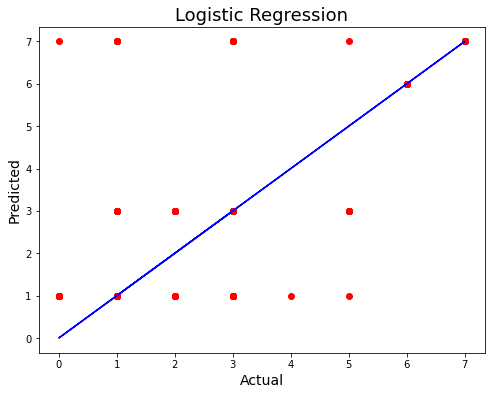

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Decision Tree Classifier as our best model as it has least difference between it's Accuracy score and CV score.

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameter={'criterion':['gini', 'entropy'] ,
           'max_depth':np.arange(2,20), 
           'max_leaf_nodes':[1,2,3,4,5,6],
           'splitter':['best','random']}

In [101]:
GCV=GridSearchCV(dt,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [102]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6, 'splitter': 'best'}

In [103]:
primfuel_final=DecisionTreeClassifier(criterion='gini', max_depth=4, max_leaf_nodes=6, splitter='best')
primfuel_final.fit(x_train,y_train)
pred=primfuel_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

74.00881057268722


### We are getting the model accuracy and cross validation score both as 74.00% which shows our model is performing well.

## PREDICTION for :

> # 2. Capacity_mw

### Spliting the data into Feature and Target:

In [104]:
X = df.drop(columns = ["capacity_mw"])
Y = df["capacity_mw"]

In [105]:
X.shape

(908, 9)

In [106]:
Y.shape

(908,)

In [107]:
# importing all the required libraries

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.9039519805530836  on Random_state 162


### Train Test Split the data:

Train Test Split the data:
We got the Best Accuracy is 0.9039519805530836  on Random_state 162. Hence, using these values we are going to train our data using following models :-

> Linear Regression

> Decision Tree Regressor

> Random Forest Regressor

> Lasso

> KNeighbors Regressor

> GradientBoostingRegressor


In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=162)

In [111]:
X_train.shape

(635, 9)

In [112]:
X_test.shape

(273, 9)

In [113]:
Y_train.shape

(635,)

In [114]:
Y_test.shape

(273,)

In [115]:
# Linear Regression

lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 90.39519805530836%


In [116]:
dtc=DecisionTreeRegressor()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 78.82893363301523%


In [117]:
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
pred=rfr.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 91.35144312822898%


In [118]:
ls=Lasso()
ls.fit(X_train,Y_train)
pred=ls.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 90.41916890642077%


In [119]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 89.98565961048782%


In [120]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
pred=gbr.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: 92.32096144257456%


In [121]:
svr=SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)
acc=r2_score(Y_test,pred)

# Getting the accuarcy score
print(f"R2 Score: {acc*100}%")

R2 Score: -2.9239325006013006%


### Cross Validation:

In [122]:
cvlr=cross_val_score(lr,X,Y,cv=5).mean()
print("Cross Validation Score for Linear Regression is : ",cvlr)

Cross Validation Score for Linear Regression is :  0.8250256891895532


In [123]:
cvdtc=cross_val_score(dtc,X,Y,cv=5).mean()
print("Cross Validation Score for Decision Tree Regressor is : ",cvdtc)

Cross Validation Score for Decision Tree Regressor is :  0.7400179772012324


In [124]:
cvrfr=cross_val_score(rfr,X,Y,cv=5).mean()
print("Cross Validation Score for Random Forest Regressorr is : ",cvrfr)

Cross Validation Score for Random Forest Regressorr is :  0.842533285273287


In [125]:
cvls=cross_val_score(ls,X,Y,cv=5).mean()
print("Cross Validation Score for Lasso is : ",cvls)

Cross Validation Score for Lasso is :  0.8249829218895496


In [126]:
cvknn=cross_val_score(knn,X,Y,cv=5).mean()
print("Cross Validation Score for KNeighborsRegressor is : ",cvknn)

Cross Validation Score for KNeighborsRegressor is :  0.8364411159639829


In [127]:
cvgbr=cross_val_score(gbr,X,Y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Regressor is : ",cvgbr)

Cross Validation Score for Gradient Boosting Regressor is :  0.8458589809755941


In [128]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross Validation Score for SVR is : ",cvsvr)

Cross Validation Score for SVR is :  0.5263755217802906


### Overfitting & Underfitting:

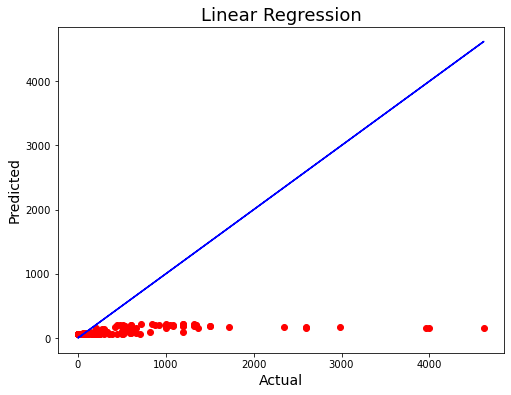

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(Y_test,pred,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting KNeighborsRegressor as our best model as it has least difference between it's Accuracy score and CV score.

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameter={'n_neighbors':[5],
           'algorithm':['auto'],
          'metric':['minkowski'],
           'leaf_size':[30]}

In [132]:
GCV = GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [133]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [5]})

In [134]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}

In [135]:
capacity_final=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',n_neighbors=5)
capacity_final.fit(X_train,Y_train)
pred=capacity_final.predict(X_test)
acc=r2_score(Y_test,pred)
print(acc*100)

89.98565961048782


### We are getting the model accuracy and cross validation score both as 89.98% which shows our model is performing well.

### Saving the model:

In [136]:
import joblib
joblib.dump(primfuel_final,"Power_plant_Primary_fuel_prediction(submission).pkl")

['Power_plant_Primary_fuel_prediction(submission).pkl']

In [137]:
import joblib
joblib.dump(capacity_final,"Power_plant_Capacity_prediction(submission).pkl")

['Power_plant_Capacity_prediction(submission).pkl']

In [138]:
Primary_fuel_model = joblib.load(open('Power_plant_Primary_fuel_prediction(submission).pkl','rb'))
result = Primary_fuel_model.score(x_test,y_test)
print(result)

0.7400881057268722


In [139]:
Capacity_model = joblib.load(open('Power_plant_Capacity_prediction(submission).pkl','rb'))
result = Capacity_model.score(X_test,Y_test)
print(result)

0.8998565961048781


### Conclusion:

We are getting the best accuracy for predicting the Primary_fuel is 74.00%

We are getting the best r2 score for predicting the capacity_mw is 89.98%

                                                       ----- --:-- -----